<a href="https://www.bharathkreddy.com"><img align="left" src="https://i.imgur.com/axjt3Qe.png" alt="WWW.BHARARTHKREDDY.COM" title="www.bharathkreddy.com"></a>
# [www.bharathkreddy.com](https://www.bharathkreddy.com)

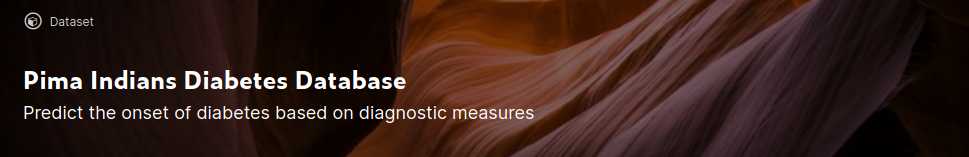

## About the case study

### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

You can read more about the data [here](https://github.com/bharathkreddy/ML-Bootcamp/blob/master/data/pima-indians-diabetes.names)

## Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

## Load and review data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/bharathkreddy/ML-Bootcamp/master/data/pima-indians-diabetes.data.csv'
                 ,names=['Pregnant','plasma','bp','skin','insulin','bmi','dpf','age','diagnosis'])

In [5]:
df.shape # Check number of columns and rows in data frame

(768, 9)

In [7]:
df.head()

,Pregnant,plasma,bp,skin,insulin,bmi,dpf,age,diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.isnull().values.any() # If there are any null values in data set

False

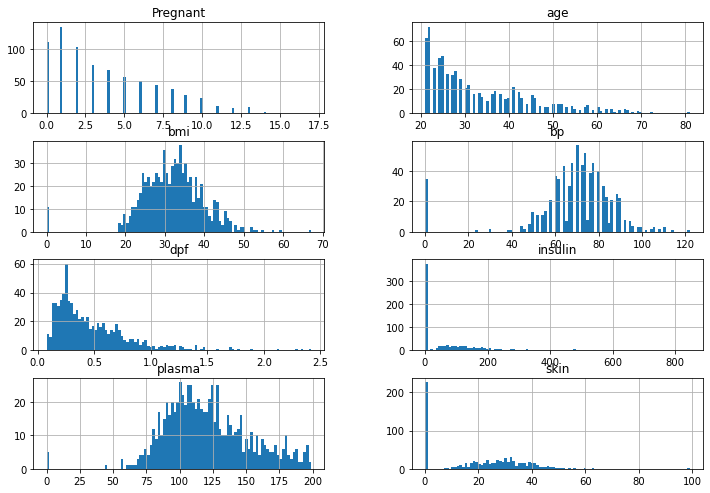

In [11]:
columns = list(df)[0:-1] # Excluding Outcome column which has only 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

## Identify Correlation in data 

In [12]:
df.corr() # It will show correlation matrix 

,Pregnant,plasma,bp,skin,insulin,bmi,dpf,age,diagnosis
Pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diagnosis,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

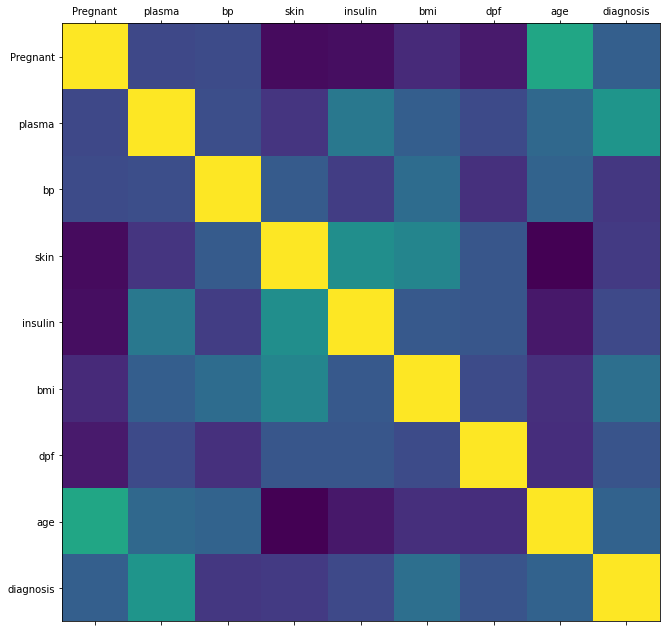

In [14]:
plot_corr(df)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

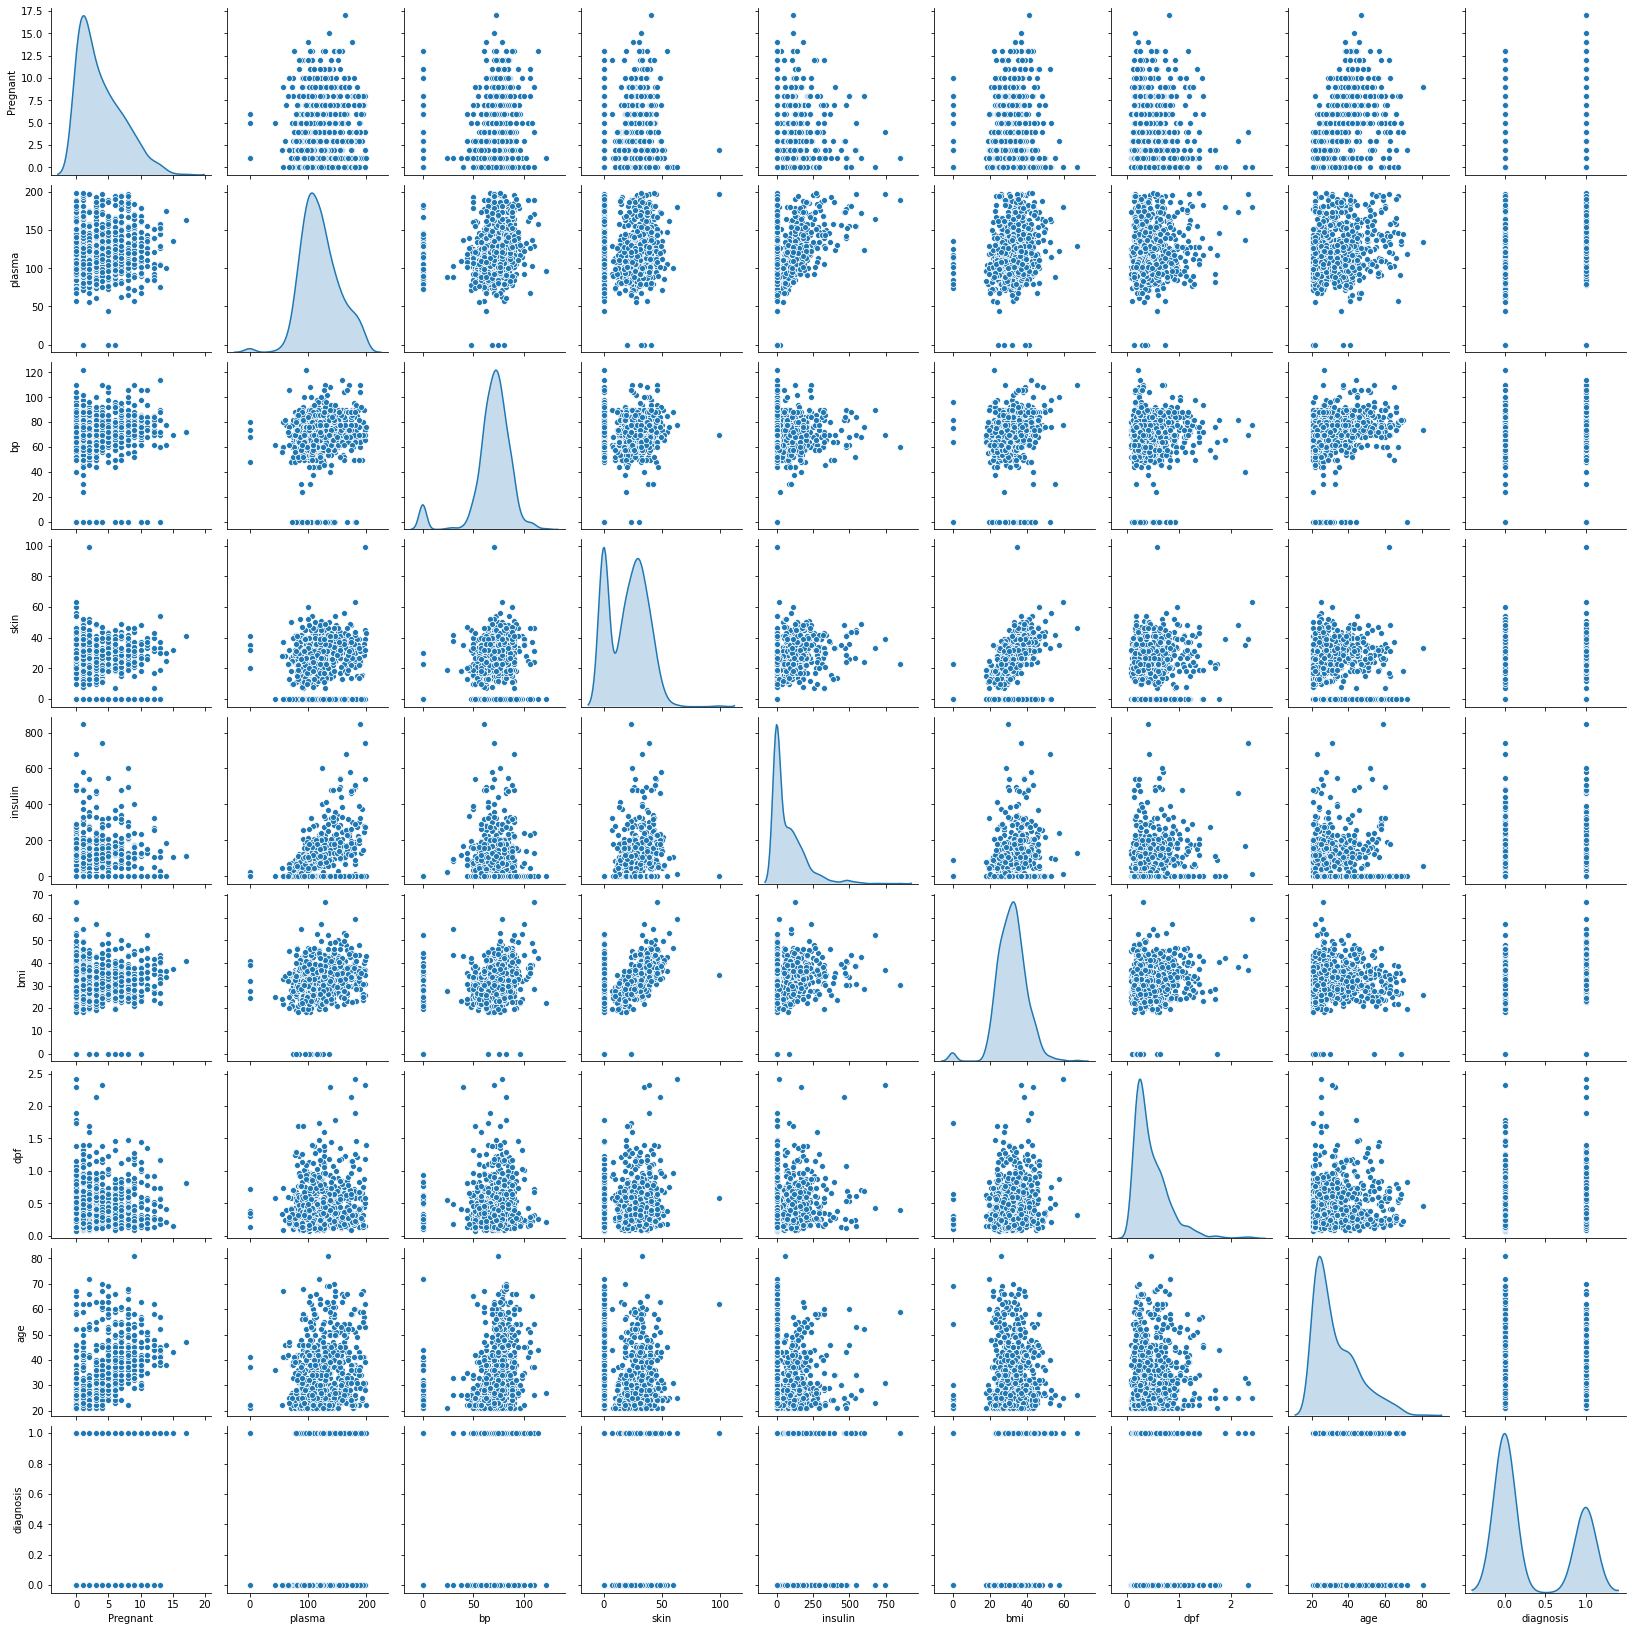

In [15]:
sns.pairplot(df,diag_kind='kde')

## Spliting the data 
I will use 70% of data for training and 30% for testing.

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis',axis=1)     # Predictor feature columns (8 X m)

Y = df['diagnosis']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# 1 is just any random seed number

x_train.head()

,Pregnant,plasma,bp,skin,insulin,bmi,dpf,age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


Lets check split of data

We can see lots of 0 entries above.

### Replace 0s with serial mean 

In [24]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,Pregnant,plasma,bp,skin,insulin,bmi,dpf,age
0,1.000000,95.0,60.0,18.0,58.0,23.9,0.260,22.0
1,5.000000,105.0,72.0,29.0,325.0,36.9,0.159,28.0
2,4.340564,135.0,68.0,42.0,250.0,42.3,0.365,24.0
3,4.000000,131.0,68.0,21.0,166.0,33.1,0.160,28.0
4,1.000000,103.0,30.0,38.0,83.0,43.3,0.183,33.0


# Train Naive Bayes algorithm 

In [25]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train.ravel())

GaussianNB()

### Performance of our model with training data

In [26]:
diab_train_predict = diab_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 0.7542



### Performance of our model with testing data

In [27]:
diab_test_predict = diab_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.7359



### Lets check the confusion matrix and classification report 

In [29]:
pd.crosstab(diab_test_predict,y_test)

diagnosis,0,1
row_0,,
0,118,28
1,33,52


In [30]:
print("Classification Report")
print(metrics.classification_report(y_test, diab_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



We can see our true positive numbers with value 1 is  of precision and recall is below 70% 

# END OF NOTEBOOK